In [1]:
import numpy as np;
import pandas as pd;
import seaborn as sns;
import matplotlib.pyplot as plt;

In [2]:
combined = pd.read_csv("CombinedData.csv"); 

In [3]:
# color palette choices
OkabeIto = ["#E69F00","#56B4E9","#009E73","#F0E442","#0072B2","#D55E00","#CC79A7","#000000"];
TolBright = ['#4477AA','#66CCEE','#228833','#CCBB44','#EE6677','#AA3377','#BBBBBB'];
Tolhighcontrast = ['#004488','#BB5566','#DDAA33']; #use this one for WT vs KO




In [4]:
sns.set_style("whitegrid", {'axes.grid' : False, 'ytick.left': True,'xtick.bottom': True});
# Set color palette
sns.set_palette(sns.color_palette(Tolhighcontrast));

# Set font type
plt.rcParams['font.sans-serif'] = "Arial";
# Then, "ALWAYS use sans-serif fonts"
plt.rcParams['font.family'] = "sans-serif";


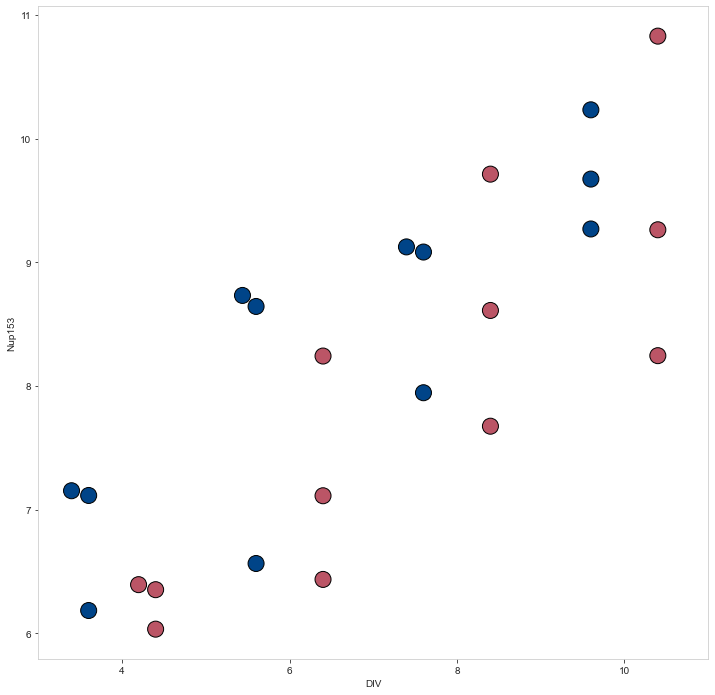

In [34]:
## Get positions for error bar plot - NUP153

ReplicateAverages = combined.groupby(['DIV','Replicate','Genotype'], as_index=False).agg({'Nup153': "mean"});

# first group errors (stdev) and means
errors = ReplicateAverages.groupby(['DIV', 'Genotype']).std()['Nup153'];
means = ReplicateAverages.groupby(['DIV','Genotype']).mean()['Nup153']

# Make one graph of the replicate averages to get coords
plt.gcf().set_size_inches(12, 12);  # set graph size
ax = sns.swarmplot(x="DIV", y="Nup153", hue="Genotype", size=16, edgecolor="k", linewidth=1, data=ReplicateAverages,dodge=True); 
ax.legend_.remove(); 
# Find the x,y coordinates for each point
x_coords = [];

for point_pair in ax.collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x);
        
# Average 3 replicate x_coord positions
ave_xcoords = [];
for i in [0,3,6,9,12,15,18,21]:
    coordave = (x_coords[i]+x_coords[i+1]+x_coords[i+2])/3;
    ave_xcoords.append(coordave);



In [35]:
# Ave_xcoords shows that each dodged dataset is 0.2 - and + of tickmark
# We can use this to get the actual middle of each dataset

# Get x tick coordinates 
coords = ax.get_xticks();
xcoords =[];
for coord in coords:
    xcoords.append(coord-0.2);
    xcoords.append(coord+0.2);
    
xcoords

[-0.2, 0.2, 0.8, 1.2, 1.8, 2.2, 2.8, 3.2]

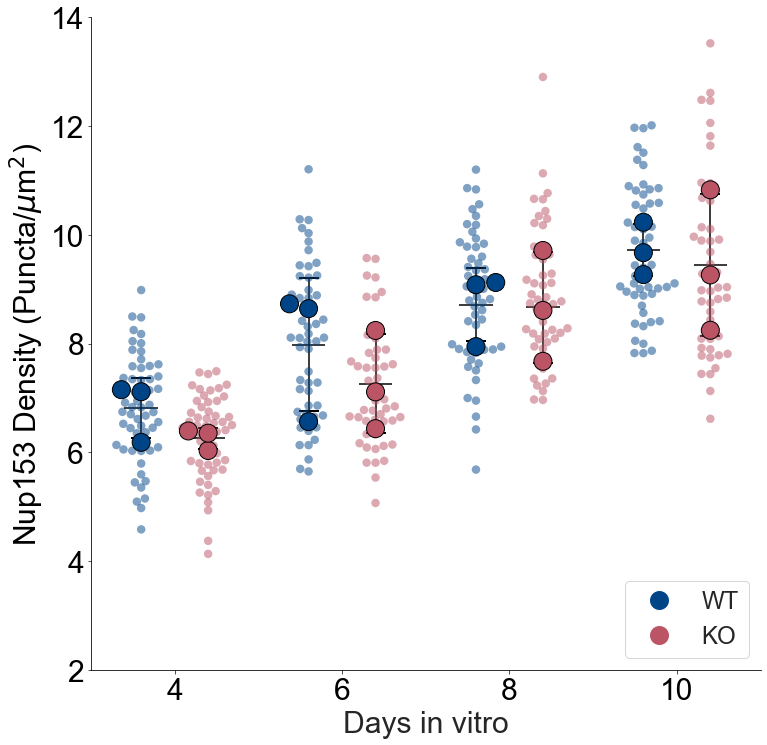

In [37]:
plt.gcf().set_size_inches(12, 12);  # set graph size
# Plot all data (small swarm)
sns.swarmplot(x="DIV", y="Nup153", size = 8.5, hue="Genotype", data=combined, hue_order = [0,1], alpha=0.5, dodge=True);

# Plot the replicate averages
ax = sns.swarmplot(x="DIV", y="Nup153", hue="Genotype", size=18, edgecolor="k", linewidth=1, data=ReplicateAverages, hue_order = [0,1], dodge=True);

ax.legend_.remove(); 
sns.despine(); #get rid of the top and right spines

# Plot error bars. separate yerr for stdev and xerr as a small tick
ax.errorbar(xcoords,means,yerr= errors, ecolor = 'k',fmt=' ',ls=None,capthick =2,capsize=10,visible=True)
ax.errorbar(xcoords, means, xerr = 0.1, ecolor='k', ls=None, fmt=' ',capthick=2,visible=True)

# Styles
plt.yticks(np.arange(2, 16, 2.0),fontsize=30,color='k');
plt.xticks(fontsize=30, color='k');
ax.set_xlabel('Days in vitro', fontsize=30,labelpad=5);
ax.set_ylabel('Nup153 Density (Puncta/$\mu$m$^2$)', fontsize=30, labelpad=5, color='k');
#ax.set_title('Nup153',fontsize=36, pad=10);

# Change bottom and left axis colors to black
ax.spines['bottom'].set_color('#000000');
ax.spines['left'].set_color('#000000');


# Custom legend
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', label='WT',color='w',
                          markerfacecolor='#004488', markersize=20),
                Line2D([0], [0], marker='o', label='KO',color='w',
                          markerfacecolor='#BB5566', markersize=20)]

ax.legend(legend_elements,['WT','KO'],loc='lower right',fontsize=24);

plt.savefig('Nup153_Density_WT_KO_notitle_start2.png', dpi=600, bbox_inches='tight'); 
plt.savefig('Nup153_Density_WT_KO_notitle_start2.pdf',bbox_inches='tight');
plt.savefig('Nup153_Density_WT_KO_notitle_start2.svg',bbox_inches='tight');



In [38]:
## Get positions for error bar plot - JFX554

ReplicateAverages = combined.groupby(['DIV','Replicate','Genotype'], as_index=False).agg({'JFX554': "mean"});

# first group errors (stdev) and means
errors = ReplicateAverages.groupby(['DIV', 'Genotype']).std()['JFX554'];
means = ReplicateAverages.groupby(['DIV','Genotype']).mean()['JFX554']




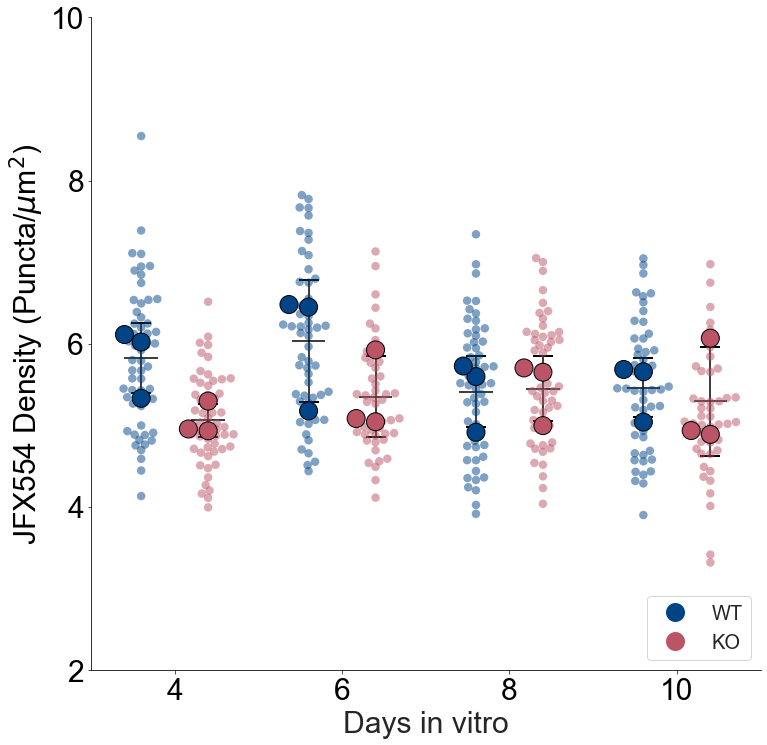

In [39]:
plt.gcf().set_size_inches(12, 12);  # set graph size
# Plot all data (small swarm)
sns.swarmplot(x="DIV", y="JFX554", size = 8.5, hue="Genotype", data=combined, hue_order = [0,1], alpha=0.5, dodge=True);

# Plot the replicate averages
ax = sns.swarmplot(x="DIV", y="JFX554", hue="Genotype", size=18, edgecolor="k", linewidth=1, data=ReplicateAverages, hue_order = [0,1], dodge=True);

ax.legend_.remove(); 
sns.despine(); #get rid of the top and right spines

# Plot error bars. separate yerr for stdev and xerr as a small tick
ax.errorbar(xcoords,means,yerr= errors, ecolor = 'k',fmt=' ',ls=None,capthick =2,capsize=10,visible=True)
ax.errorbar(xcoords, means, xerr = 0.1, ecolor='k', ls=None, fmt=' ',capthick=2,visible=True)

# Styles
plt.yticks(np.arange(2, 12, 2.0),fontsize=30,color='k');
plt.xticks(fontsize=30, color='k');
ax.set_xlabel('Days in vitro', fontsize=30,labelpad=5);
ax.set_ylabel('JFX554 Density (Puncta/$\mu$m$^2$)', fontsize=30,labelpad=5, color='k');
#ax.set_title('JFX554',fontsize=36, pad=10);

# Change bottom and left axis colors to black
ax.spines['bottom'].set_color('#000000');
ax.spines['left'].set_color('#000000');


# Custom legend
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', label='WT',color='w',
                          markerfacecolor='#004488', markersize=20),
                Line2D([0], [0], marker='o', label='KO',color='w',
                          markerfacecolor='#BB5566', markersize=20)]

# Custom legend
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', label='WT',color='w',
                          markerfacecolor='#004488', markersize=20),
                Line2D([0], [0], marker='o', label='KO',color='w',
                          markerfacecolor='#BB5566', markersize=20)]

ax.legend(legend_elements,['WT','KO'],loc='lower right',fontsize=20);

plt.savefig('JFX554_Density_WT_KO_notitle_start2.png', dpi=600, bbox_inches='tight'); 
plt.savefig('JFX554_Density_WT_KO_notitle_start2.pdf',bbox_inches='tight');
plt.savefig('JFX554_Density_WT_KO_notitle_start2.svg',bbox_inches='tight');

In [13]:
# Make subdf for DIV6~10
combined_sub = combined.loc[(combined['DIV']!=4)]


In [40]:

## Get positions for error bar plot - JF646

ReplicateAverages = combined_sub.groupby(['DIV','Replicate','Genotype'], as_index=False).agg({'JF646_unique': "mean"});

# first group errors (stdev) and means
errors = ReplicateAverages.groupby(['DIV', 'Genotype']).std()['JF646_unique'];
means = ReplicateAverages.groupby(['DIV','Genotype']).mean()['JF646_unique']

# Set xcoords accounting for 3 timepoints only
xcoords = [-0.2, 0.2, 0.8, 1.2, 1.8, 2.2]


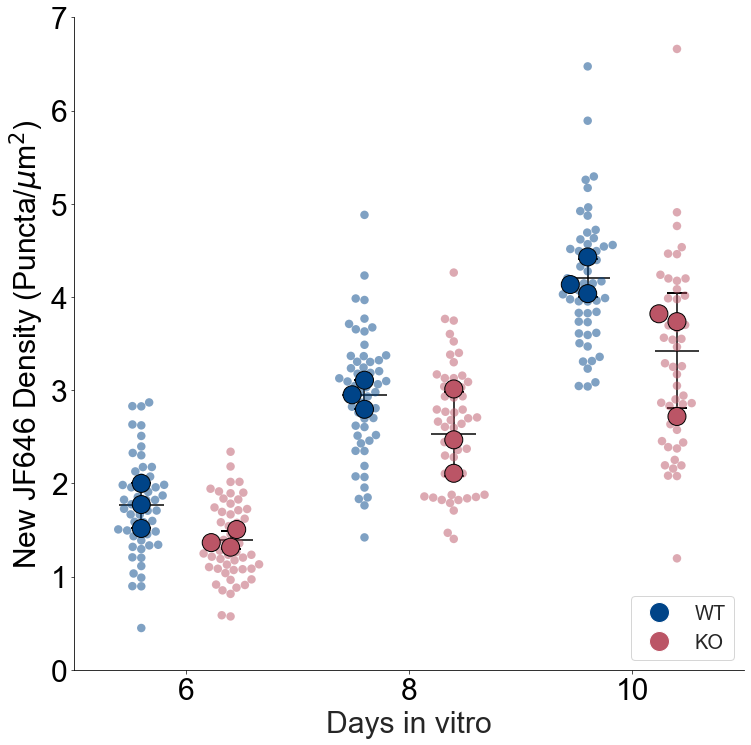

In [42]:
plt.gcf().set_size_inches(12, 12);  # set graph size
# Plot all data (small swarm)
sns.swarmplot(x="DIV", y="JF646_unique", size = 8.5, hue="Genotype", hue_order = [0,1], data=combined_sub, alpha=0.5, dodge=True);

# Plot the replicate averages
ax = sns.swarmplot(x="DIV", y="JF646_unique", hue="Genotype", size=18, edgecolor="k", linewidth=1, data=ReplicateAverages, hue_order = [0,1], dodge=True);

ax.legend_.remove(); 
sns.despine(); #get rid of the top and right spines

# Plot error bars. separate yerr for stdev and xerr as a small tick
ax.errorbar(xcoords,means,yerr= errors, ecolor = 'k',fmt=' ',ls=None,capthick =2,capsize=10,visible=True)
ax.errorbar(xcoords, means, xerr = 0.1, ecolor='k', ls=None, fmt=' ',capthick=2,visible=True)

# Styles
plt.yticks(np.arange(0, 8, 1.0),fontsize=30,color='k');
plt.xticks(fontsize=30, color='k');
ax.set_xlabel('Days in vitro', fontsize=30,labelpad=5);
ax.set_ylabel('New JF646 Density (Puncta/$\mu$m$^2$)', fontsize=30,labelpad=5, color='k');
#ax.set_title('New JF646',fontsize=36, pad=10);

# Change bottom and left axis colors to black
ax.spines['bottom'].set_color('#000000');
ax.spines['left'].set_color('#000000');


# Custom legend
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', label='WT',color='w',
                          markerfacecolor='#004488', markersize=20),
                Line2D([0], [0], marker='o', label='KO',color='w',
                          markerfacecolor='#BB5566', markersize=20)]

# Custom legend
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', label='WT',color='w',
                          markerfacecolor='#004488', markersize=20),
                Line2D([0], [0], marker='o', label='KO',color='w',
                          markerfacecolor='#BB5566', markersize=20)]

ax.legend(legend_elements,['WT','KO'],loc='lower right',fontsize=20);

plt.savefig('New_JF646_Density_WT_KO_notitle.png', dpi=600, bbox_inches='tight'); 
plt.savefig('New_JF646_Density_WT_KO_notitle.pdf',bbox_inches='tight');
plt.savefig('New_JF646_Density_WT_KO_notitle.svg',bbox_inches='tight');

In [18]:
ReplicateAverages = combined.groupby(['DIV','Replicate','Genotype'], as_index=False).agg({'Circularity': "mean"});

# first group errors (stdev) and means
errors = ReplicateAverages.groupby(['DIV', 'Genotype']).std()['Circularity'];
means = ReplicateAverages.groupby(['DIV','Genotype']).mean()['Circularity']

# Set xcoords accounting for 4 timepoints 
xcoords = [-0.2, 0.2, 0.8, 1.2, 1.8, 2.2, 2.8, 3.2]


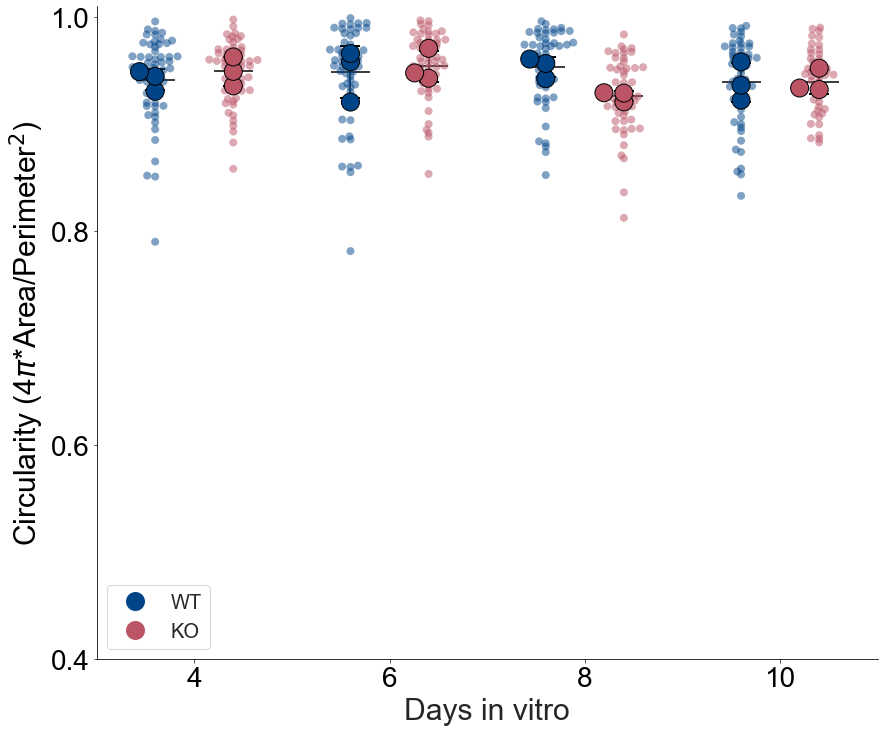

In [19]:
plt.gcf().set_size_inches(14, 12);  # set graph size
# Plot all data (small swarm)
sns.swarmplot(x="DIV", y="Circularity", size = 8, hue="Genotype", data=combined, alpha=0.5, dodge=True);

# Plot the replicate averages
ax = sns.swarmplot(x="DIV", y="Circularity", hue="Genotype", size=18, edgecolor="k", linewidth=1, data=ReplicateAverages,dodge=True); 
ax.legend_.remove(); 
sns.despine(); #get rid of the top and right spines

# Plot error bars. separate yerr for stdev and xerr as a small tick
ax.errorbar(xcoords,means,yerr= errors, ecolor = 'k',fmt=' ',ls=None,capthick =2,capsize=10,visible=True)
ax.errorbar(xcoords, means, xerr = 0.1, ecolor='k', ls=None, fmt=' ',capthick=2,visible=True)

# Styles
plt.yticks(np.arange(0.4, 1.2, 0.2),fontsize=28,color='k');
plt.xticks(fontsize=28, color='k');
ax.set_xlabel('Days in vitro', fontsize=30,labelpad=5);
ax.set_ylabel('Circularity (4$\pi$*Area/Perimeter$^2$)', fontsize=30,color='k',labelpad=5);

ax.spines['bottom'].set_color('#000000');
ax.spines['left'].set_color('#000000');

# Custom legend
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', label='WT',color='w',
                          markerfacecolor='#004488', markersize=20),
                Line2D([0], [0], marker='o', label='KO',color='w',
                          markerfacecolor='#BB5566', markersize=20)]

ax.legend(legend_elements,['WT','KO'],loc='lower left',fontsize=20);

plt.savefig('Circularity_WT_KO.png', dpi=600, bbox_inches='tight'); 
plt.savefig('Circularity_WT_KO.pdf',bbox_inches='tight');
plt.savefig('Circularity_WT_KO.svg',bbox_inches='tight');

In [21]:
## Get positions for error bar plot - Nuclear Area

ReplicateAverages = combined.groupby(['DIV','Replicate','Genotype'], as_index=False).agg({'ROI_orig': "mean"});

# first group errors (stdev) and means
errors = ReplicateAverages.groupby(['DIV', 'Genotype']).std()['ROI_orig'];
means = ReplicateAverages.groupby(['DIV','Genotype']).mean()['ROI_orig']

xcoords = [-0.2, 0.2, 0.8, 1.2, 1.8, 2.2, 2.8, 3.2]


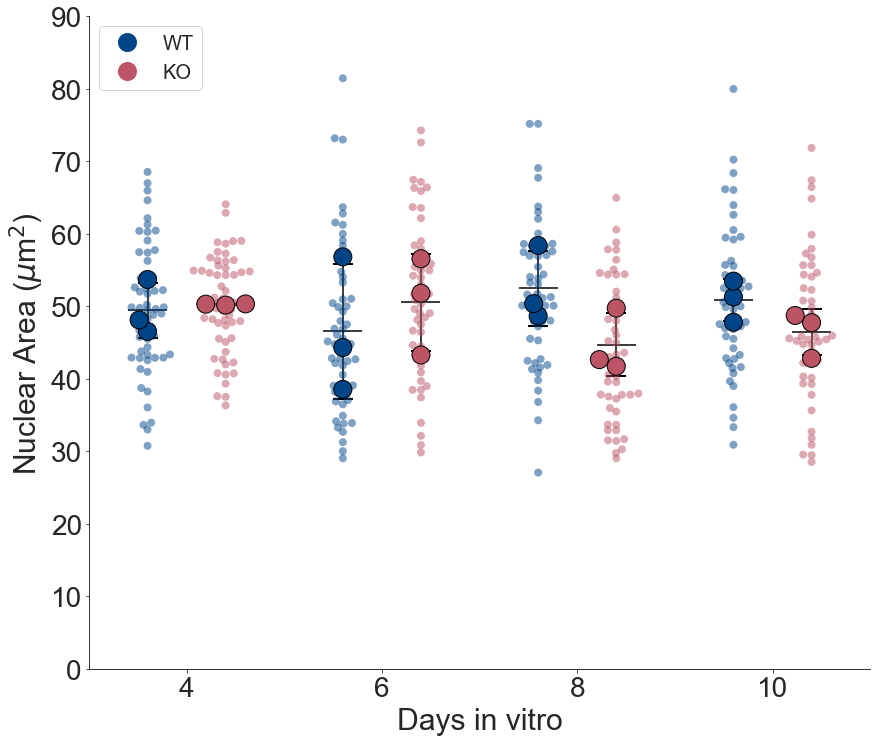

In [22]:
plt.gcf().set_size_inches(14, 12);  # set graph size
# Plot all data (small swarm)
sns.swarmplot(x="DIV", y="ROI_orig", size = 8, hue="Genotype", data=combined, alpha=0.5, dodge=True);

# Plot the replicate averages
ax = sns.swarmplot(x="DIV", y="ROI_orig", hue="Genotype", size=18, edgecolor="k", linewidth=1, data=ReplicateAverages,dodge=True); 
ax.legend_.remove(); 
sns.despine(); #get rid of the top and right spines

# Plot error bars. separate yerr for stdev and xerr as a small tick
ax.errorbar(xcoords,means,yerr= errors, ecolor = 'k',fmt=' ',ls=None,capthick =2,capsize=10,visible=True)
ax.errorbar(xcoords, means, xerr = 0.1, ecolor='k', ls=None, fmt=' ',capthick=2,visible=True)

# Styles
plt.yticks(np.arange(0, 100, 10),fontsize=28);
plt.xticks(fontsize=28);
ax.set_xlabel('Days in vitro', fontsize=30, labelpad=5);
ax.set_ylabel('Nuclear Area ($\mu$m$^2$)', fontsize=30, labelpad=5);
#ax.set_title('Nuclear Area',fontsize=36, pad=10);

ax.spines['bottom'].set_color('#000000');
ax.spines['left'].set_color('#000000');

# Custom legend
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', label='WT',color='w',
                          markerfacecolor='#004488', markersize=20),
                Line2D([0], [0], marker='o', label='KO',color='w',
                          markerfacecolor='#BB5566', markersize=20)]

ax.legend(legend_elements,['WT','KO'],loc='upper left',fontsize=20);

plt.savefig('NucArea_WT_KO.png', dpi=600, bbox_inches='tight'); 
plt.savefig('NucArea_WT_KO.pdf',bbox_inches='tight');
plt.savefig('NucArea_WT_KO.svg',bbox_inches='tight');